In [18]:
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

In [19]:
teams = pd.read_csv('/Users/cello/data/Teams(2011~2015).csv')
salaries = pd.read_csv('/Users/cello/data/Salaries(2011~2015).csv')

In [20]:
teams = teams[['yearID', 'teamID', 'Rank', 'R', 'RA', 'G', 'W','L','H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B']]

In [21]:
teams['BA'] = teams['H']/teams['AB']
teams['OBP'] = (teams['H'] + teams['BB'] + teams['HBP']) / (teams['AB'] + teams['BB'] + teams['HBP'] + teams['SF'])
teams['SLG'] = (teams['H'] + teams['2B'] + (2*teams['3B']) + (3*teams['HR'])) / teams['AB']

In [5]:
winteam = teams.loc[teams['teamID'].isin(['SLN','SFN','BOS','KCA'])]

In [6]:
winteam = teams.loc[teams['teamID'].isin(['SLN'])]

In [7]:
winteam = winteam[['yearID', 'teamID', 'BA', 'OBP', 'SLG']]

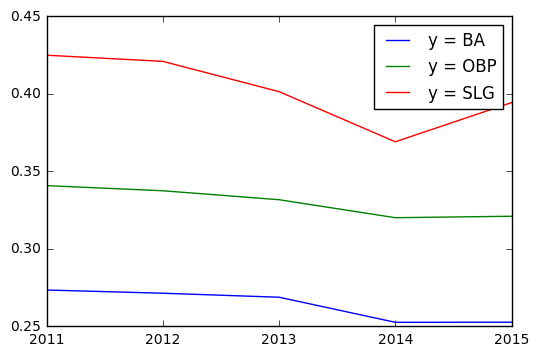

In [8]:
%matplotlib inline
x = np.array(winteam['yearID'])
y = np.array(winteam['BA'])
y1 = np.array(winteam['OBP'])
y2 = np.array(winteam['SLG'])
my_xticks = x
plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.legend(['y = BA', 'y = OBP', 'y = SLG'], loc='best')
plt.show()

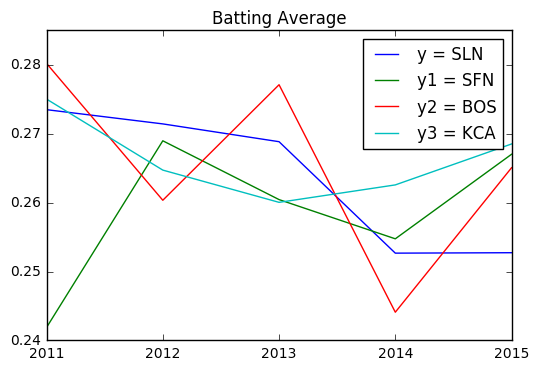

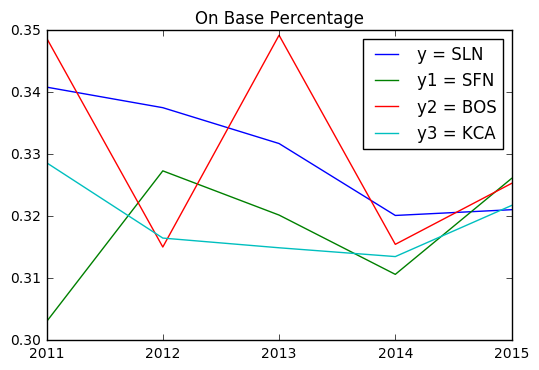

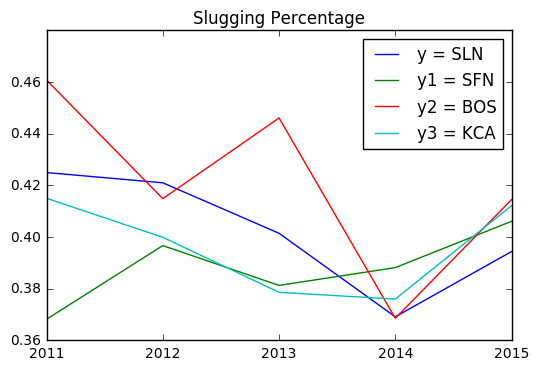

In [9]:
%matplotlib inline
x = np.array(winteam['yearID'])
team1 = teams.loc[teams['teamID'].isin(['SLN'])]
team2 = teams.loc[teams['teamID'].isin(['SFN'])]
team3 = teams.loc[teams['teamID'].isin(['BOS'])]
team4 = teams.loc[teams['teamID'].isin(['KCA'])]
y = np.array(team1['BA'])
y1 = np.array(team2['BA'])
y2 = np.array(team3['BA'])
y3 = np.array(team4['BA'])
my_xticks = x
plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)                         
plt.legend(['y = SLN', 'y1 = SFN', 'y2 = BOS', 'y3 = KCA'], loc='best')
plt.title('Batting Average')
plt.show()
y = np.array(team1['OBP'])
y1 = np.array(team2['OBP'])
y2 = np.array(team3['OBP'])
y3 = np.array(team4['OBP'])
plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3) 
plt.legend(['y = SLN', 'y1 = SFN', 'y2 = BOS', 'y3 = KCA'], loc='best')
plt.title('On Base Percentage')
plt.show()
y = np.array(team1['SLG'])
y1 = np.array(team2['SLG'])
y2 = np.array(team3['SLG'])
y3 = np.array(team4['SLG'])
plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)  
plt.title('Slugging Percentage')
plt.legend(['y = SLN', 'y1 = SFN', 'y2 = BOS', 'y3 = KCA'], loc='best')
plt.show()

In [24]:
salaries_by_yearID_teamID = salaries.groupby(['yearID', 'teamID'])['salary'].sum()

In [28]:
teams = teams.set_index(['yearID', 'teamID'])

In [29]:
teams = teams.join(salaries_by_yearID_teamID)

In [43]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)

def plot_spending_wins(teams, year):    
    teams_year = teams.xs(year)
    fig, ax = plt.subplots()
    for i in teams_year.index:
        if i == 'SLN':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#4DDB94", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#4DDB94"),
                        xytext=(30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'SFN':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#0099FF", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#0099FF"),
                        xytext=(30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'BOS':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#FF6666", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#FF6666"),
                        xytext=(30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10"))
        elif i == 'KCA':
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="#FFBF00", s=200)
            ax.annotate(i, (teams_year['salary'][i], teams_year['W'][i]),
                        bbox=dict(boxstyle="round", color="#FFBF00"),
                        xytext=(-30, 30), textcoords='offset points',
                        arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10")) 
        else:
            ax.scatter(teams_year['salary'][i], teams_year['W'][i], color="grey", s=200)
    ax.xaxis.set_major_formatter(formatter) 
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlabel('Salaries', fontsize=20)
    ax.set_ylabel('Number of Wins' , fontsize=20)
    ax.set_title('Salaries - Wins: '+ str(year), fontsize=25, fontweight='bold')
    plt.show()

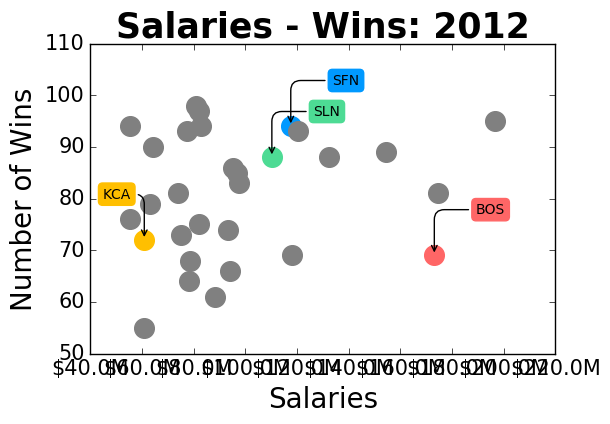

In [46]:
plot_spending_wins(teams, 2013)